In [84]:
import pandas as pd
df = pd.read_csv('heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


<Axes: >

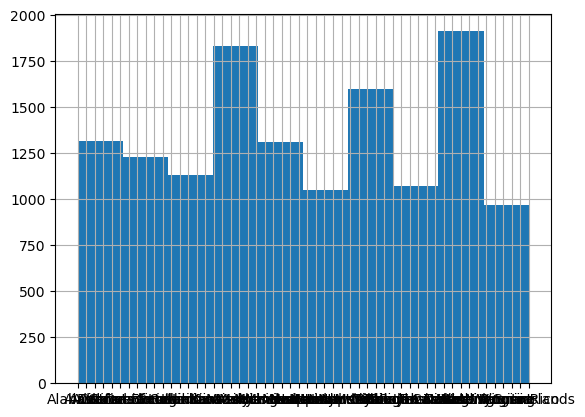

In [85]:
df[df['HadHeartAttack'] == 'Yes']['State'].hist()

Возможно, штат как-то и влияет на вероятность сердечного приступа, но мы пока что его выкинем, потому что делать one-hot-encoding категориальной переменной с 54 значениями как-то не хочется. Если качество будет плохим, можно будет попробовать добавить бинарную фичу, отвечающую за принадлежность к топ-3 штатам по количеству сердечных приступов

In [86]:
df = df.drop(columns=['State'])

Числовые фичи нужно нормализовать

In [87]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,-0.014160,-0.514291,Within past year (anytime less than 12 months ...,Yes,1.373426,None of them,No,No,...,-0.985902,-0.560197,-0.104105,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,-0.490019,-0.514291,Within past year (anytime less than 12 months ...,Yes,-0.708922,None of them,No,No,...,0.701798,0.545643,0.224420,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,Very good,-0.490019,-0.514291,Within past year (anytime less than 12 months ...,No,0.679310,"6 or more, but not all",No,No,...,1.358125,1.183916,0.459299,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Female,Fair,0.104805,-0.514291,Within past year (anytime less than 12 months ...,Yes,1.373426,None of them,No,No,...,-0.048291,0.333197,0.407104,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Female,Good,-0.133125,1.336947,Within past year (anytime less than 12 months ...,Yes,-1.403038,1 to 5,No,No,...,-1.454707,-0.198619,0.675757,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Значения GeneralHealth имеют внутренний порядок, поэтому лучше закодировать их целыми числами, чем применять one-hot-encoding. То же самое касается фичей LastCheckupTime, AgeCategory и RemovedTeeth

In [88]:
df['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [89]:
df['GeneralHealth'] = df['GeneralHealth'].map({
    "Poor" : 0,
    "Good" : 1,
    "Very good" : 2,
    "Fair" : 3,
    "Excellent" : 4
})


In [90]:
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

In [91]:
df['LastCheckupTime'] = df['LastCheckupTime'].map({
    'Within past year (anytime less than 12 months ago)' : 0,
    'Within past 2 years (1 year but less than 2 years ago)' : 1,
    'Within past 5 years (2 years but less than 5 years ago)' : 2,
    '5 or more years ago' : 3
})

In [92]:
df['RemovedTeeth'].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

In [93]:
df['RemovedTeeth'] = df['RemovedTeeth'].map({
    'None of them' : 0,
    '1 to 5' : 1,
    '6 or more, but not all' : 2,
    'All' : 3
})

In [94]:
sorted(df['AgeCategory'].unique())

['Age 18 to 24',
 'Age 25 to 29',
 'Age 30 to 34',
 'Age 35 to 39',
 'Age 40 to 44',
 'Age 45 to 49',
 'Age 50 to 54',
 'Age 55 to 59',
 'Age 60 to 64',
 'Age 65 to 69',
 'Age 70 to 74',
 'Age 75 to 79',
 'Age 80 or older']

In [95]:
df['AgeCategory'] = df['AgeCategory'].map({
    cat : i for i, cat in enumerate(sorted(df['AgeCategory']))
})

А вот фичи SmokerStatus, RaceEthnicityCategory, TetanusLast10Tdap и ECigaretteUsage можно закодировать one-hot-encoding-ом

In [96]:
df = pd.get_dummies(
    df, 
    columns=[
        'ECigaretteUsage',
        'SmokerStatus',
        'RaceEthnicityCategory',
        'TetanusLast10Tdap'
    ], 
    drop_first=True,
    dtype=float
)

Все колонки, имеющие только значения Yes/No нужно бинаризовать. Пол также стоит бинаризовать

In [97]:
for column in df.columns:
    if sorted(df[column].unique()) == ["No", "Yes"]:
        df[column] = df[column].map({
            "Yes" : 1,
            "No" : 0
        })
df['Sex'] = df['Sex'].map({
            "Male" : 1,
            "Female" : 0
        }) 
df['HadDiabetes'] = df['HadDiabetes'].map({
    'No' : 0, 
    'Yes' : 1,
    'Yes, but only during pregnancy (female)' : 1,
    'No, pre-diabetes or borderline diabetes' : 0
})
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap"
0,0,2,-0.014160,-0.514291,0,1,1.373426,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,2,-0.490019,-0.514291,0,1,-0.708922,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,2,-0.490019,-0.514291,0,0,0.679310,2,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,3,0.104805,-0.514291,0,1,1.373426,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,-0.133125,1.336947,0,1,-1.403038,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Колонку CovidPos тоже бинаризую. Надеюсь, что 3% отнесенных к больным с использованием домашнего теста не обидятся

In [98]:
df['CovidPos'] = df['CovidPos'].map({
    "Yes" : 1,
    "No" : 0,
    "Tested positive using home test without a health professional" : 1
})

В датасете огромный дисбаланс классов. Наверное, имеет смысл выкинуть бОльшую часть датасета

In [99]:
condition = (df['HadHeartAttack'] == 0)
rows_to_drop = int(0.9 * len(df[condition]))
indices_to_drop = df[condition].sample(n=rows_to_drop).index
df = df.drop(indices_to_drop)

<Axes: >

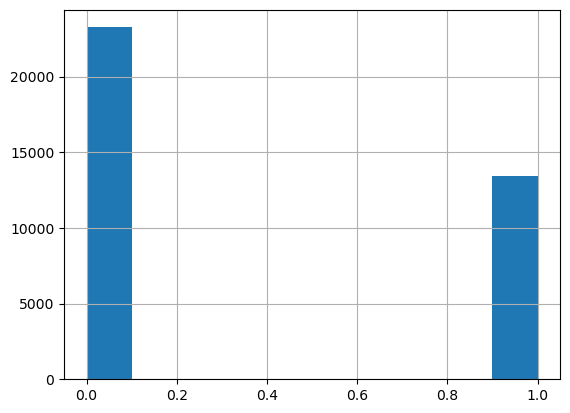

In [116]:
df['HadHeartAttack'].hist()

Препроцессинг закончен, можно обучать модели. Начем с логистической регрессии

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['HadHeartAttack']),
    df['HadHeartAttack'],
    test_size=0.1,
    stratify=df['HadHeartAttack']
)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2326
           1       0.82      0.66      0.73      1344

    accuracy                           0.82      3670
   macro avg       0.82      0.79      0.80      3670
weighted avg       0.82      0.82      0.82      3670



НБК:

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
print(classification_report(y_test, gnb.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2326
           1       0.68      0.51      0.58      1344

    accuracy                           0.73      3670
   macro avg       0.72      0.69      0.69      3670
weighted avg       0.73      0.73      0.72      3670



Катбуст:

In [114]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(
    iterations=10000,
    learning_rate=0.1
)
cb.fit(X_train, y_train)

0:	learn: 0.6331322	total: 8.1ms	remaining: 1m 21s
1:	learn: 0.5869884	total: 16ms	remaining: 1m 19s
2:	learn: 0.5498122	total: 24.7ms	remaining: 1m 22s
3:	learn: 0.5222907	total: 35.1ms	remaining: 1m 27s
4:	learn: 0.4993052	total: 43.1ms	remaining: 1m 26s
5:	learn: 0.4811037	total: 50.8ms	remaining: 1m 24s
6:	learn: 0.4668749	total: 60ms	remaining: 1m 25s
7:	learn: 0.4552115	total: 70.3ms	remaining: 1m 27s
8:	learn: 0.4469280	total: 79.2ms	remaining: 1m 27s
9:	learn: 0.4395133	total: 88.5ms	remaining: 1m 28s
10:	learn: 0.4337357	total: 97.2ms	remaining: 1m 28s
11:	learn: 0.4278626	total: 107ms	remaining: 1m 29s
12:	learn: 0.4238800	total: 117ms	remaining: 1m 29s
13:	learn: 0.4209082	total: 126ms	remaining: 1m 29s
14:	learn: 0.4182655	total: 134ms	remaining: 1m 29s
15:	learn: 0.4158620	total: 143ms	remaining: 1m 29s
16:	learn: 0.4136419	total: 157ms	remaining: 1m 31s
17:	learn: 0.4119686	total: 178ms	remaining: 1m 38s
18:	learn: 0.4097566	total: 193ms	remaining: 1m 41s
19:	learn: 0.407

In [115]:
print(classification_report(y_test, cb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2326
           1       0.76      0.70      0.73      1344

    accuracy                           0.81      3670
   macro avg       0.80      0.79      0.79      3670
weighted avg       0.81      0.81      0.81      3670

